# K-Means使用

## 生成随机数据

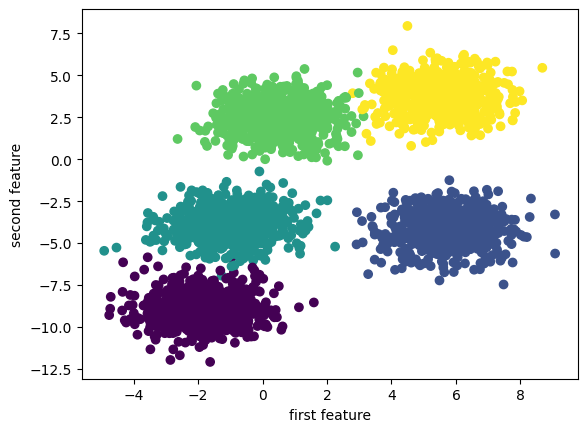

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=3000, # 样本数量
    n_features=2, # 样本特征数
    centers=5, # 类簇数量
    random_state=40 # 设置随机数种子，确保每次生成的数据保持一致
)

# 可视化数据集
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

# 开始聚类

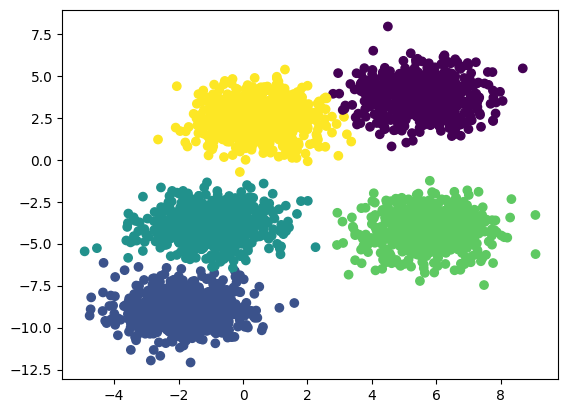

In [9]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=5, # 设置最佳聚类数
    random_state=42, # 设置随机数种子，确保每次的聚类结果是一致的
    n_init="auto", 
)

# 开始聚类
model.fit(X)
# 获取聚类结果
y_hat = model.labels_

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=y_hat)
plt.show()

## 手肘法(Elbow Method)

- SSE(Sum of the Squared Errors)
$$
SSE = \sum_{i=1}^k \sum_{p \in C_i} {\lVert p - m_i \rVert}^2 \\
$$
- 其中$k$表示类簇数量, $C_i$表示第$i$个类簇, $p$表示属于$C_i$的点, $m_i$表示$C_i$的中心。

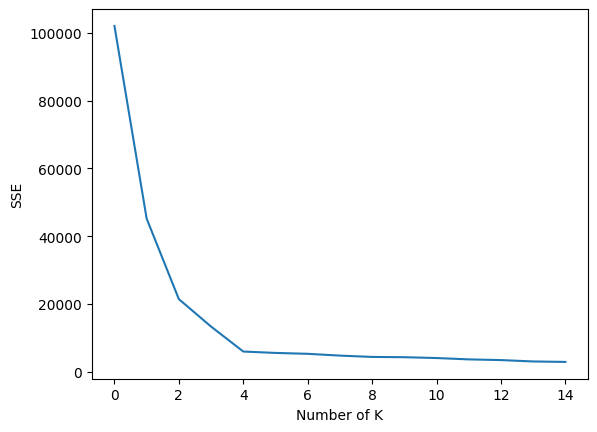

In [18]:
from sklearn.cluster import KMeans

# 分别在设置不同k值的情况下聚类
inertia_list = []
for i in range(1, 16):
    model = KMeans(n_clusters=i, random_state=40, n_init="auto")
    model.fit(X)
    inertia_list.append(model.inertia_)

# 画折线图
plt.plot(inertia_list)
plt.xlabel("Number of K")
plt.ylabel("SSE")
x_ticks, x_labels = plt.xticks()
plt.show()

## Silhouette Coefficient

如何计算轮廓系数？
- 对于每个样本$i$, 轮廓系数$S(i)$的计算公式如下:
$$
S(i) = \frac{b(i) - a(i)}{max\{a(i), \, b(i)\}}
$$
- $a(i)$表示样本$i$到同一簇内其他样本的平均距离
- $b(i)$表示样本$i$到其他簇内所有样本的平均距离
- 轮廓系数的取值范围在$[-1, 1]$之间, 越接近1, 说明样本被分到了正确的类簇中, 并且离其他类簇有一定距离, 越接近-1则相反, 等于0则是在边界上。

如何确定最佳聚类数？
1. 分别在设置不同k值的情况下聚类, 得到每一次聚类所有样本的平均轮廓系数, 然后画成折线图, 对应于最大平均轮廓系数的k值就是最佳聚类数。
2. 分别在设置不同k值的情况下聚类, 画出每一次聚类的轮廓系数图, 通过观察判断出最佳聚类数。

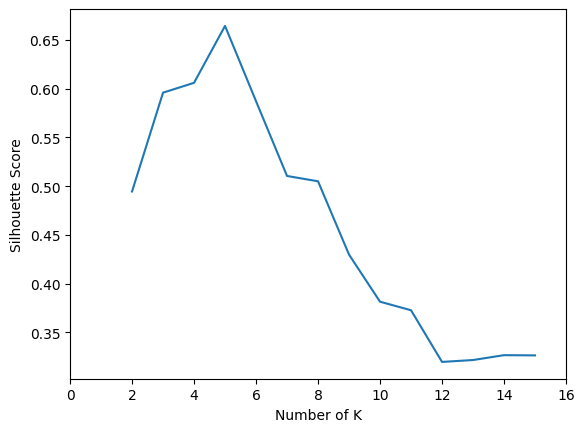

In [6]:
from sklearn.metrics import silhouette_score
import numpy as np

average_scores = []
for i in range(2, 16):
    model = KMeans(n_clusters=i, n_init="auto", random_state=42)
    model.fit(X)
    # 计算所有样本的轮廓系数
    scores = silhouette_score(X, model.labels_)
    average_score = np.mean(scores)
    average_scores.append(average_score)

# 画折线图
plt.plot(average_scores)
x_ticks, x_labels = plt.xticks()
x_labels = [f"{x_tick+2:.0f}" for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.xlabel("Number of K")
plt.ylabel("Silhouette Score")
plt.show()

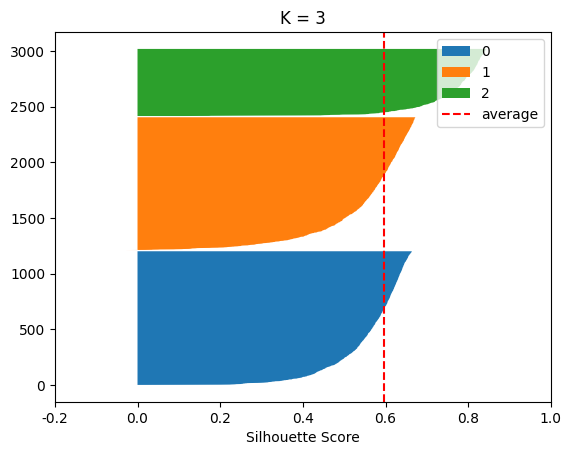

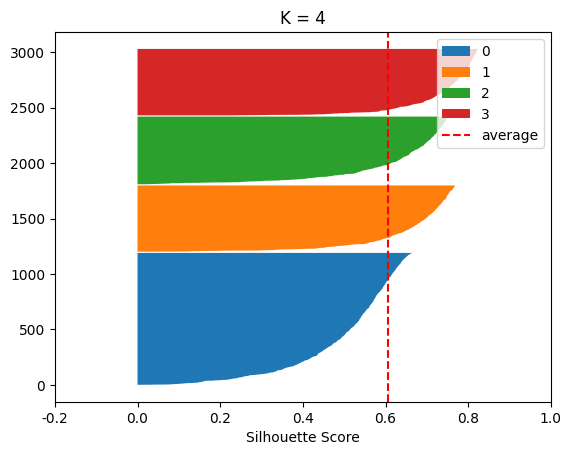

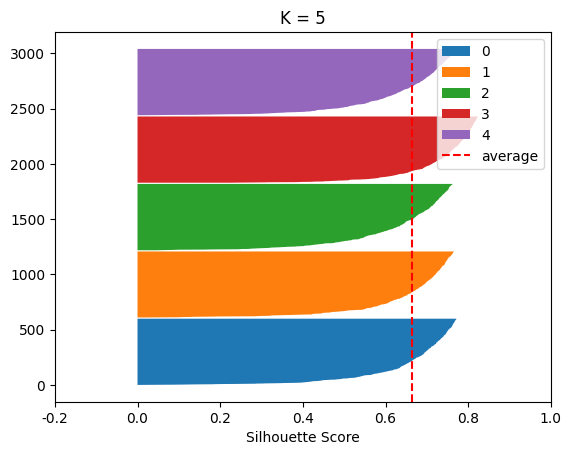

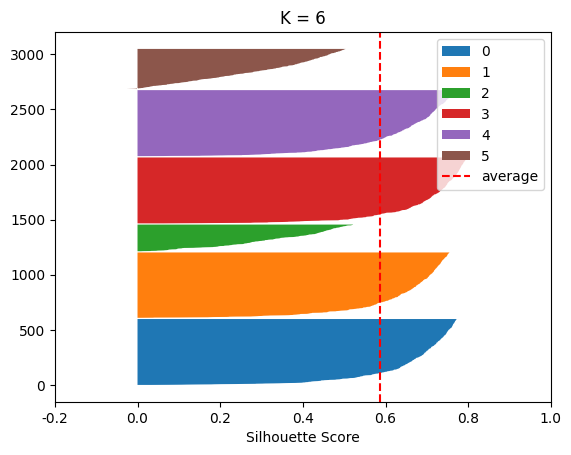

In [12]:
from sklearn.metrics import silhouette_samples
from numpy import ndarray

def plot_silhouette_scores(scores: ndarray, labels: ndarray, title=None) -> None:
    """画轮廓系数图"""
    x_min = 0.2
    y_min = 0
    cluster_margin = 10
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_scores = scores[labels == label]
        sorted_cluster_scores = np.sort(cluster_scores)
        y_max = y_min + len(cluster_scores)
        plt.fill_betweenx(np.arange(y_min, y_max), x_min, x_min+sorted_cluster_scores, label=label)
        y_min = y_max + cluster_margin
    average_score = np.mean(scores)
    plt.axvline(x_min + average_score, linestyle="--", color="r", label="average")
    x_ticks, x_labels = plt.xticks()
    x_labels = [f"{tick - x_min:.1f}" for tick in x_ticks]
    plt.xticks(x_ticks, x_labels)
    plt.xlabel("Silhouette Score")
    if title is not None:
        plt.title(title)
    plt.legend()
    plt.show()
    
for i in range(3, 7):
    model = KMeans(n_clusters=i, n_init="auto", random_state=42)
    model.fit(X)
    scores = silhouette_samples(X, model.labels_)
    plot_silhouette_scores(scores, model.labels_, title=f"K = {i}")